# ggplot2 Short Tutorial

## 設定圖片大小
[Ref](http://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html): The default repr settings are for plots to be 7 inches wide and 7 inches high.

In [63]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

## The Setup

References: http://r-statistics.co/ggplot2-Tutorial-With-R.html

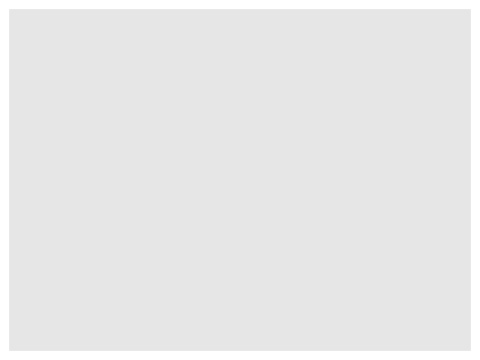

In [64]:
library(ggplot2)
ggplot(diamonds)

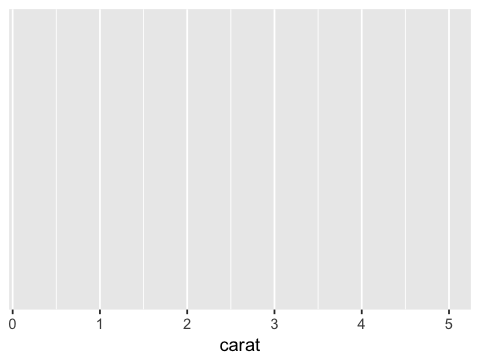

In [65]:
ggplot(diamonds, aes(x=carat))  # if only X-axis is known. The Y-axis can be specified in respective geoms.

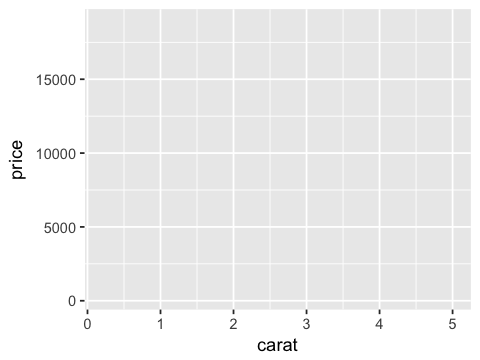

In [66]:
ggplot(diamonds, aes(x=carat, y=price))  # if both X and Y axes are fixed for all layers.

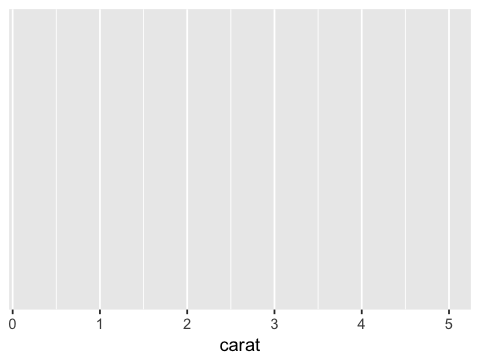

In [67]:
ggplot(diamonds, aes(x=carat, color=cut))  
# Each category of the 'cut' variable will now have a distinct  color, once a geom is added.

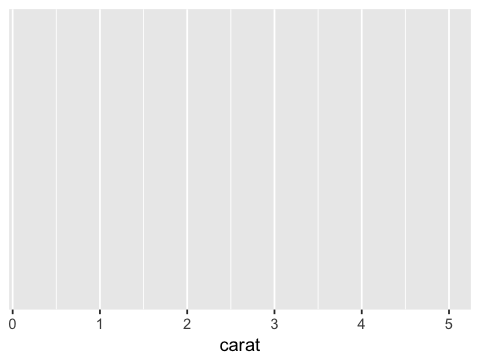

In [68]:
ggplot(diamonds, aes(x=carat), color="steelblue")

## The Layers
又稱為 geoms，表示幾何圖形

### 所有 geoms 都會繼承一開始 setup 的 aesthetics

In [72]:
options(repr.plot.width=10, repr.plot.height=4)

`geom_smooth()` using method = 'gam'


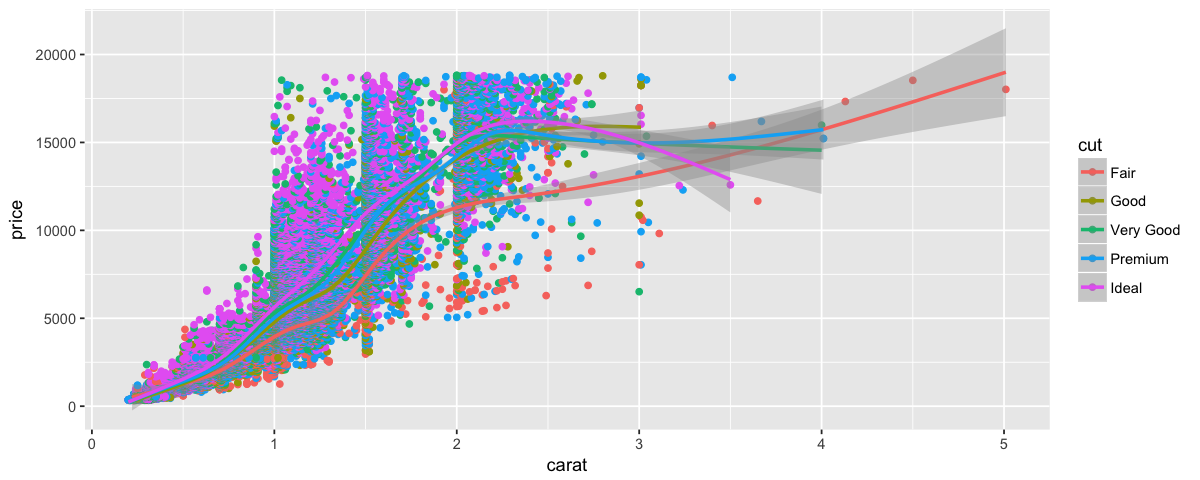

In [73]:
ggplot(diamonds, aes(x=carat, y=price, color=cut)) + geom_point() + geom_smooth() 
# Adding scatterplot geom (layer1) and smoothing geom (layer2).

### 把 aesthetics 分別寫在每個 geom 裡

`geom_smooth()` using method = 'gam'


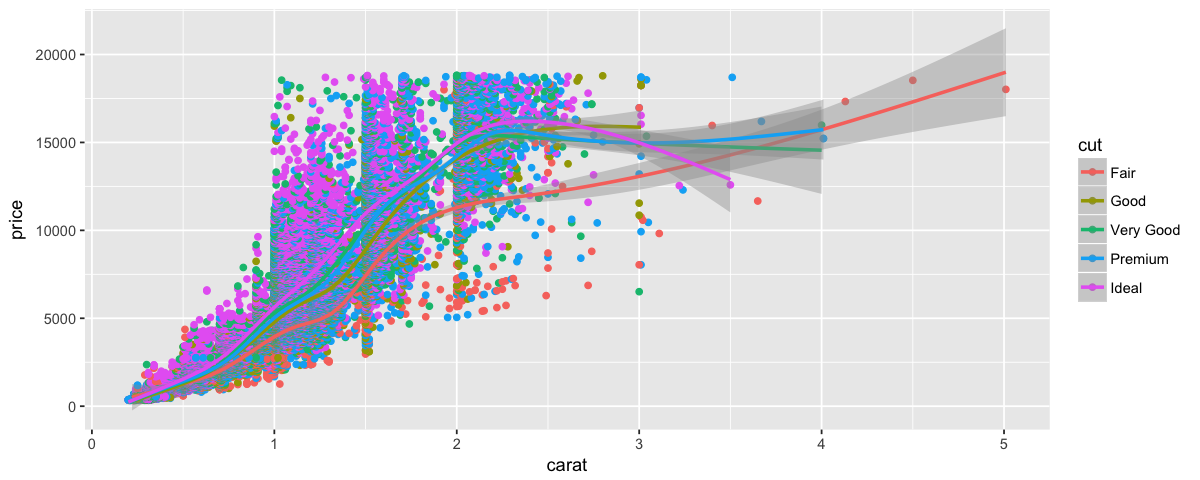

In [74]:
(ggplot(diamonds) 
+ geom_point(aes(x=carat, y=price, color=cut)) 
+ geom_smooth(aes(x=carat, y=price, color=cut)))
# Same as above but specifying the aesthetics inside the geoms.

### 在 setup 設定所有 geoms 共用的 aesthetics
個別 geom 再設定自己的 aesthetics

`geom_smooth()` using method = 'gam'


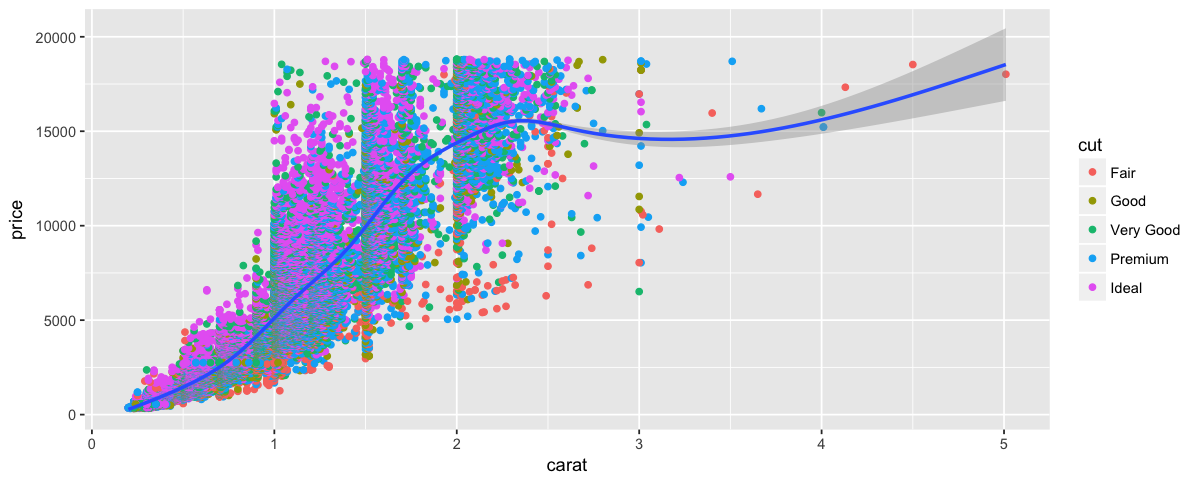

In [75]:
ggplot(diamonds, aes(x=carat, y=price)) + geom_point(aes(color=cut)) + geom_smooth()  # same but simpler

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 2808 rows containing missing values (geom_point).”

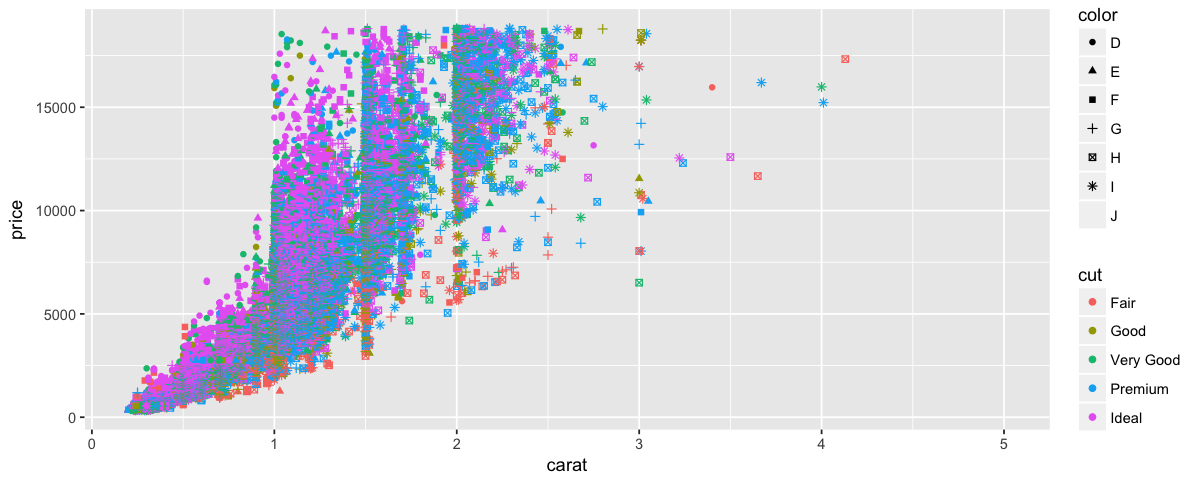

In [76]:
ggplot(diamonds, aes(x=carat, y=price, color=cut, shape=color)) + geom_point()

## The Labels
要加上 Label、標題也是加上一個 layer: `labs`。但是要改變字體大小是 [Theme](http://r-statistics.co/ggplot2-Tutorial-With-R.html#4.%20The%20Theme) 的工作

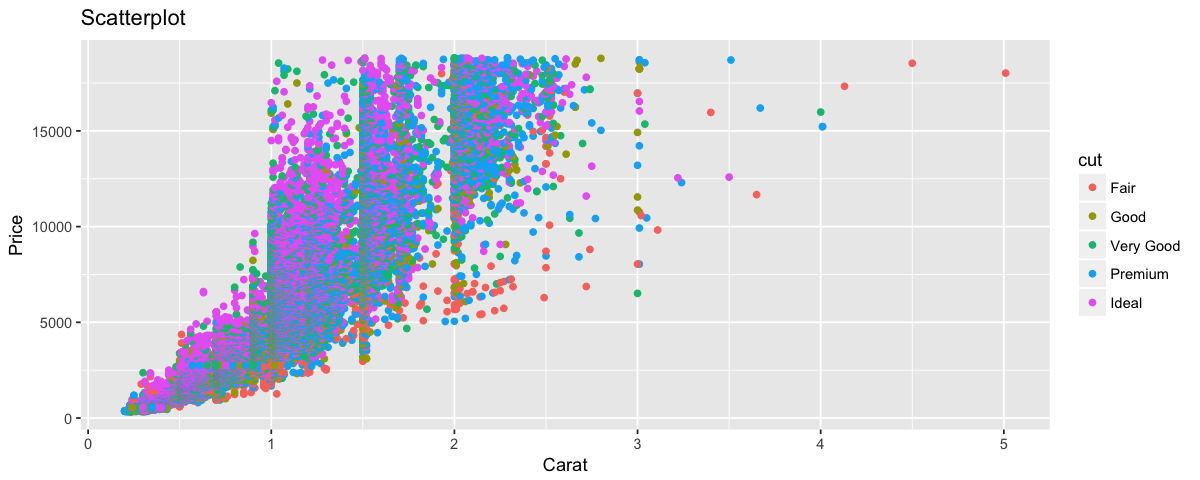

In [77]:
# add axis lables and plot title.
(gg <- ggplot(diamonds, aes(x=carat, y=price, color=cut)) 
 + geom_point() 
 + labs(title="Scatterplot", x="Carat", y="Price"))

## The Theme

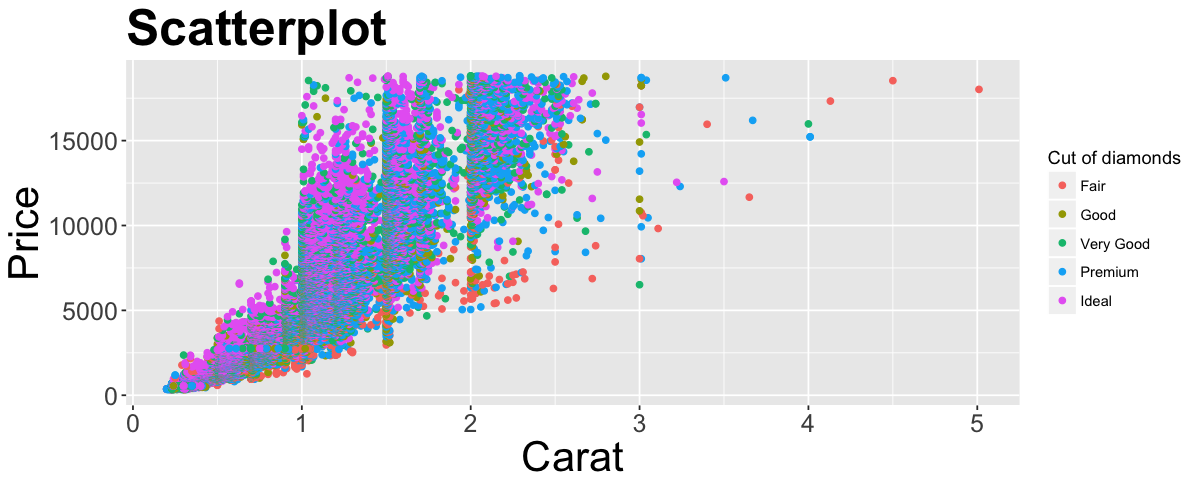

In [78]:
gg1 <- gg + theme(plot.title=element_text(size=30, face="bold"), 
                  axis.text.x=element_text(size=15), 
                  axis.text.y=element_text(size=15),
                  axis.title.x=element_text(size=25),
                  axis.title.y=element_text(size=25)) + 
  scale_color_discrete(name="Cut of diamonds")  # add title and axis text, change legend title.
gg1

## The Facets
以及改變 legend 位置
[Ref](https://stackoverflow.com/questions/16255579/how-can-i-make-consistent-width-plots-in-ggplot-with-legends/16258375)

In [82]:
options(repr.plot.width=8, repr.plot.height=6)

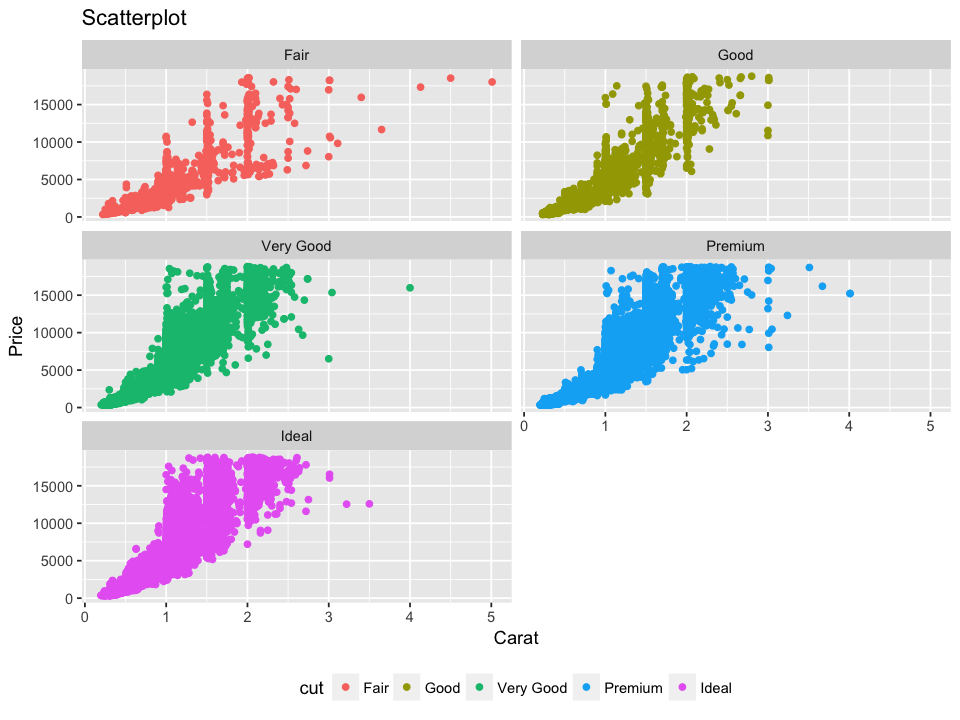

In [83]:
# columns defined by 'cut'
gg + facet_wrap( ~ cut, ncol=2) + theme(legend.position = "bottom")

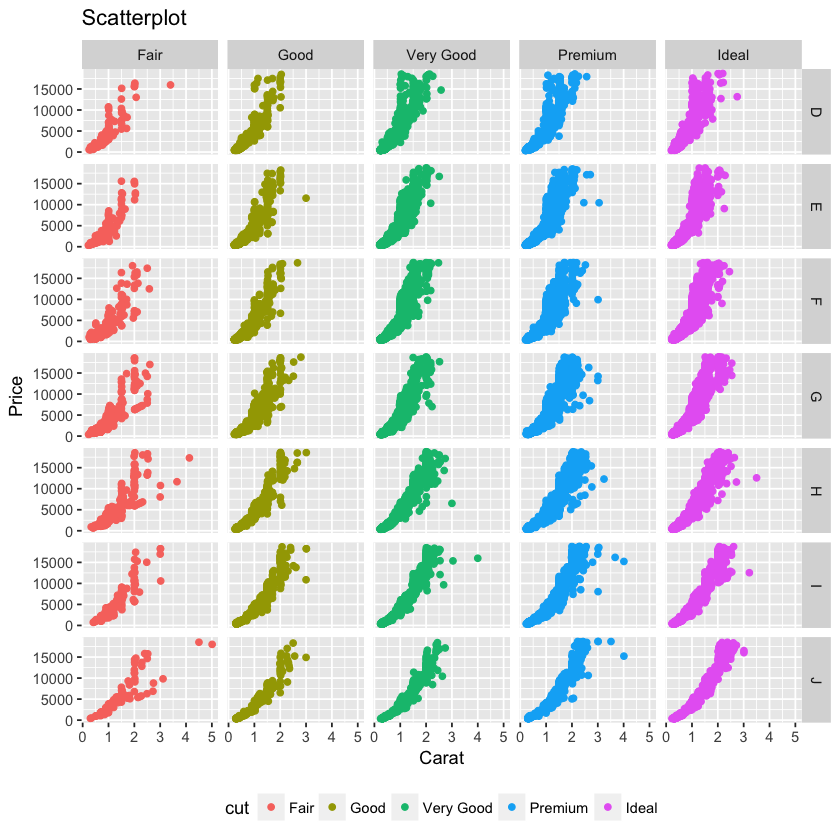

In [29]:
gg + facet_grid(color ~ cut) + theme(legend.position = "bottom")

## Commonly Used Features

### Make a time series plot (using ggfortify)

In [84]:
options(repr.plot.width=4, repr.plot.height=3)

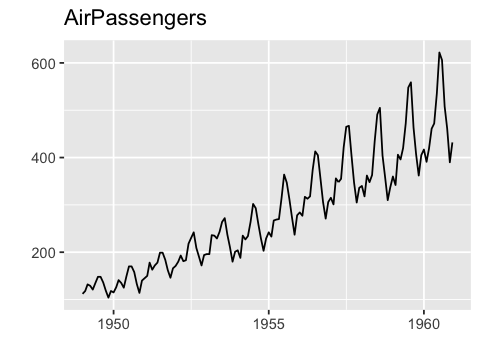

In [85]:
library(ggfortify)
autoplot(AirPassengers) + labs(title="AirPassengers")  # where AirPassengers is a 'ts' object

In [36]:
AirPassengers

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

### Plot multiple timeseries on same ggplot

In [86]:
data(economics, package="ggplot2")  # init data

#### 讀 dataset

In [87]:
economics <- data.frame(economics)  # convert to dataframe

In [88]:
class(economics)

[1] "data.frame"

In [90]:
head(economics)

date       pce   pop    psavert uempmed unemploy
1 1967-07-01 507.4 198712 12.5    4.5     2944    
2 1967-08-01 510.5 198911 12.5    4.7     2945    
3 1967-09-01 516.3 199113 11.7    4.6     2958    
4 1967-10-01 512.9 199311 12.5    4.9     3143    
5 1967-11-01 518.1 199498 12.5    4.7     3066    
6 1967-12-01 525.8 199657 12.1    4.8     3018

#### Approach 1: plot multiple time series using 'geom_line's

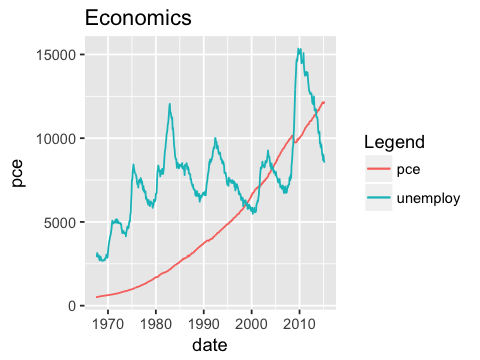

In [91]:
(ggplot(economics) + geom_line(aes(x=date, y=pce, color="pce"))
    + geom_line(aes(x=date, y=unemploy, color='unemploy'))
    + scale_color_discrete(name="Legend")
    + labs(title='Economics')
)

#### Approach 2: 使用 `reshape::melt` 將 x 軸相同，然後想要一起畫圖的欄位「融化」成一個欄
了解 wide VS long data format 差異：https://sejdemyr.github.io/r-tutorials/basics/wide-and-long/

In [92]:
library(reshape2)

In [93]:
df <- melt(economics[, c("date", "pce", "unemploy")], id="date")

In [94]:
head(df)

date       variable value
1 1967-07-01 pce      507.4
2 1967-08-01 pce      510.5
3 1967-09-01 pce      516.3
4 1967-10-01 pce      512.9
5 1967-11-01 pce      518.1
6 1967-12-01 pce      525.8

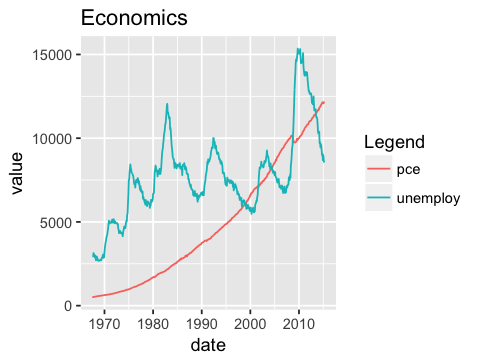

In [95]:
ggplot(df) + geom_line(aes(x=date, y=value, color=variable)) + labs(title="Economics") + scale_color_discrete(name="Legend")

#### 使用 `facet_wrap` 裡的 `scales="free"` 顯示多個 y 軸
ggplot2 一般不能在一張圖畫兩個 y軸, 要使用 facet_wrap

In [97]:
options(repr.plot.width=10, repr.plot.height=6)

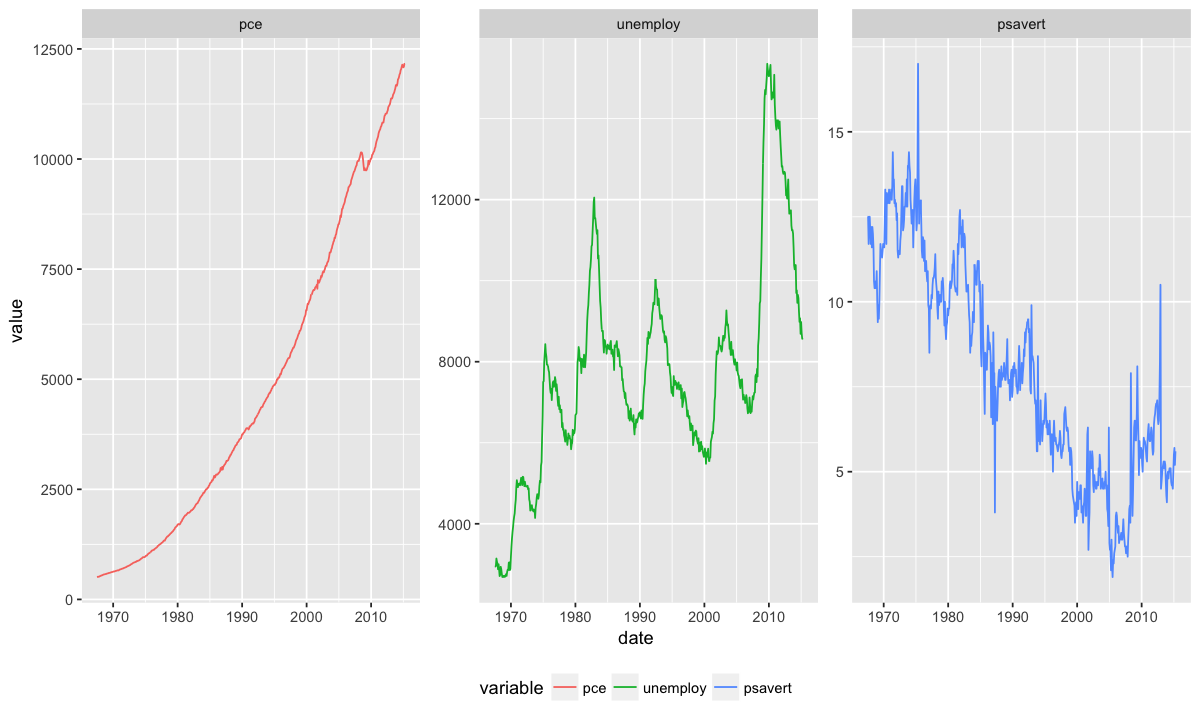

In [98]:
df <- melt(economics[, c("date", "pce", "unemploy", "psavert")], id="date")
(ggplot(df) + geom_line(aes(x=date, y=value, color=variable))  
 + facet_wrap( ~ variable, scales="free") + theme(legend.position = 'bottom'))

### Bar charts
ggplot 的長條圖預設是去 count 給定的 `x` 裡頭的每個值的數目然後畫 frequency bar。如果要一般依照 x, y 畫圖的話，要在 `geom_bar` 裡頭設定 `stat="identity"`。

In [107]:
options(repr.plot.width=4, repr.plt.height=3)

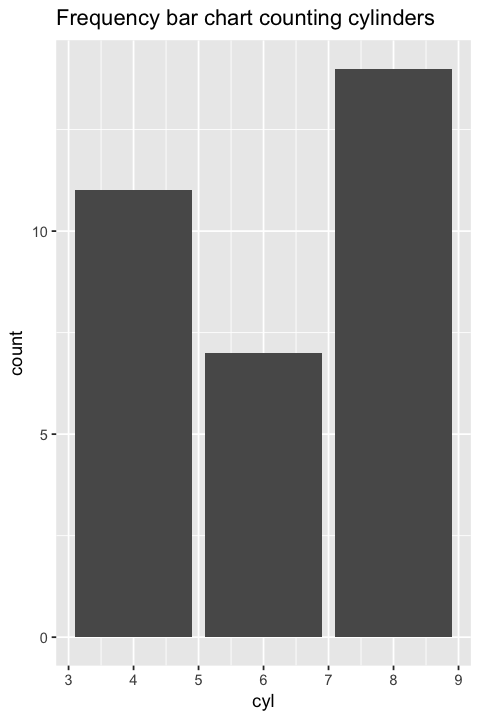

In [112]:
plot1 = ggplot(mtcars, aes(x=cyl)) + geom_bar() + labs(title="Frequency bar chart counting cylinders")
plot1

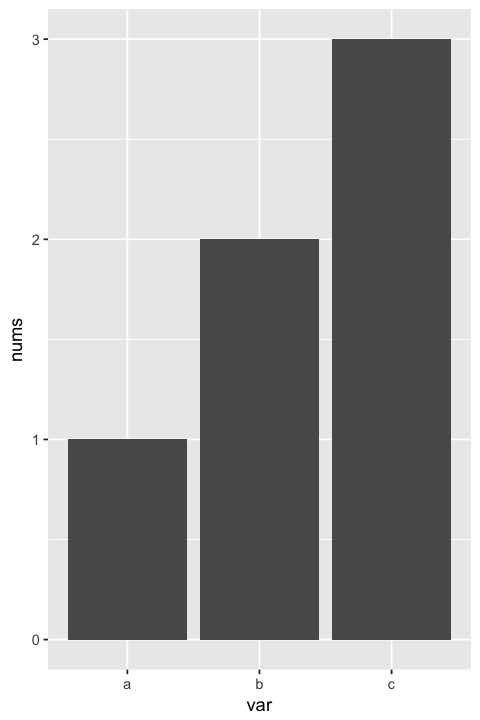

In [114]:
df <- data.frame(var=c("a", "b", "c"), nums=c(1:3))
plot2 = ggplot(df) + geom_bar(aes(x=var, y=nums), stat = 'identity')
plot2

#### 合併多個圖在同個 grid

In [116]:
library(gridExtra)

In [119]:
options(repr.plot.width=10, repr.plot.height=4)

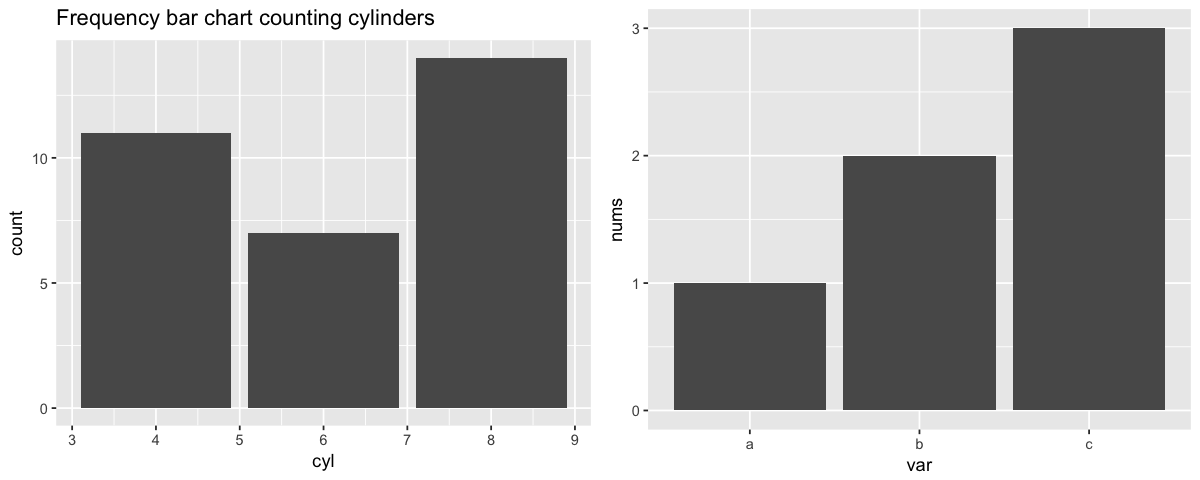

In [120]:
grid.arrange(plot1, plot2, ncol=2)

#### 轉換 x, y 軸

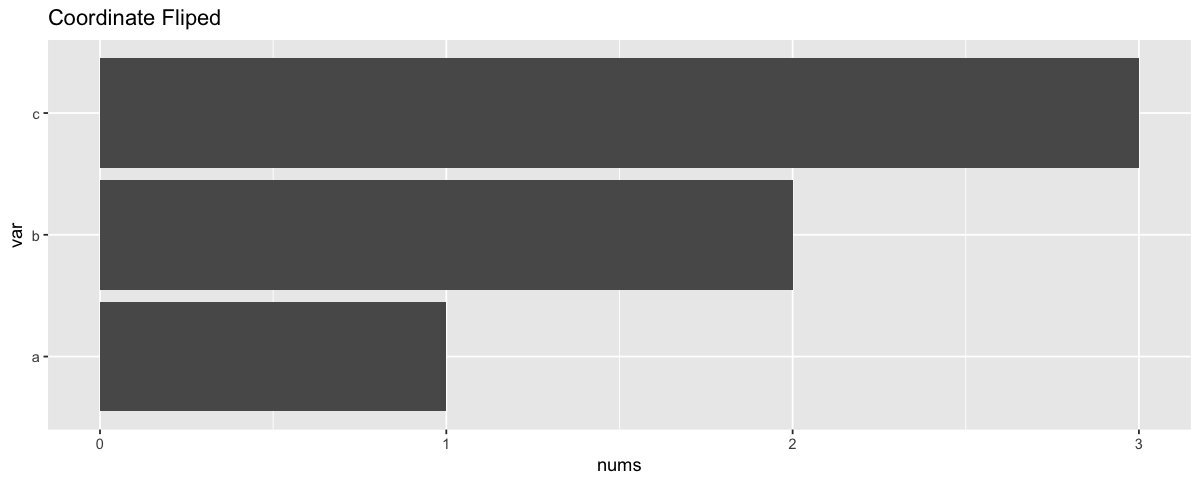

In [132]:
df = data.frame(var=c("a", "b", "c"), nums=c(1:3))
ggplot(df, aes(x=var, y=nums)) + geom_bar(stat='identity') + coord_flip() + labs(title="Coordinate Fliped")

#### 改變 x, y 軸 limit
有三種方式
1. Using coord_cartesian(xlim=c(x1,x2))
2. Using xlim(c(x1,x2))
3. Using scale_x_continuous(limits=c(x1,x2))

第一種是 Zoom in，不會把 outliers 刪掉；2, 3會實際刪掉 outlier，因此 smoothing line 會受到影響

In [134]:
head(diamonds)

carat cut       color clarity depth table price x    y    z   
1 0.23  Ideal     E     SI2     61.5  55    326   3.95 3.98 2.43
2 0.21  Premium   E     SI1     59.8  61    326   3.89 3.84 2.31
3 0.23  Good      E     VS1     56.9  65    327   4.05 4.07 2.31
4 0.29  Premium   I     VS2     62.4  58    334   4.20 4.23 2.63
5 0.31  Good      J     SI2     63.3  58    335   4.34 4.35 2.75
6 0.24  Very Good J     VVS2    62.8  57    336   3.94 3.96 2.48

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
Warning message:
“Removed 5222 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 5222 rows containing missing values (geom_point).”

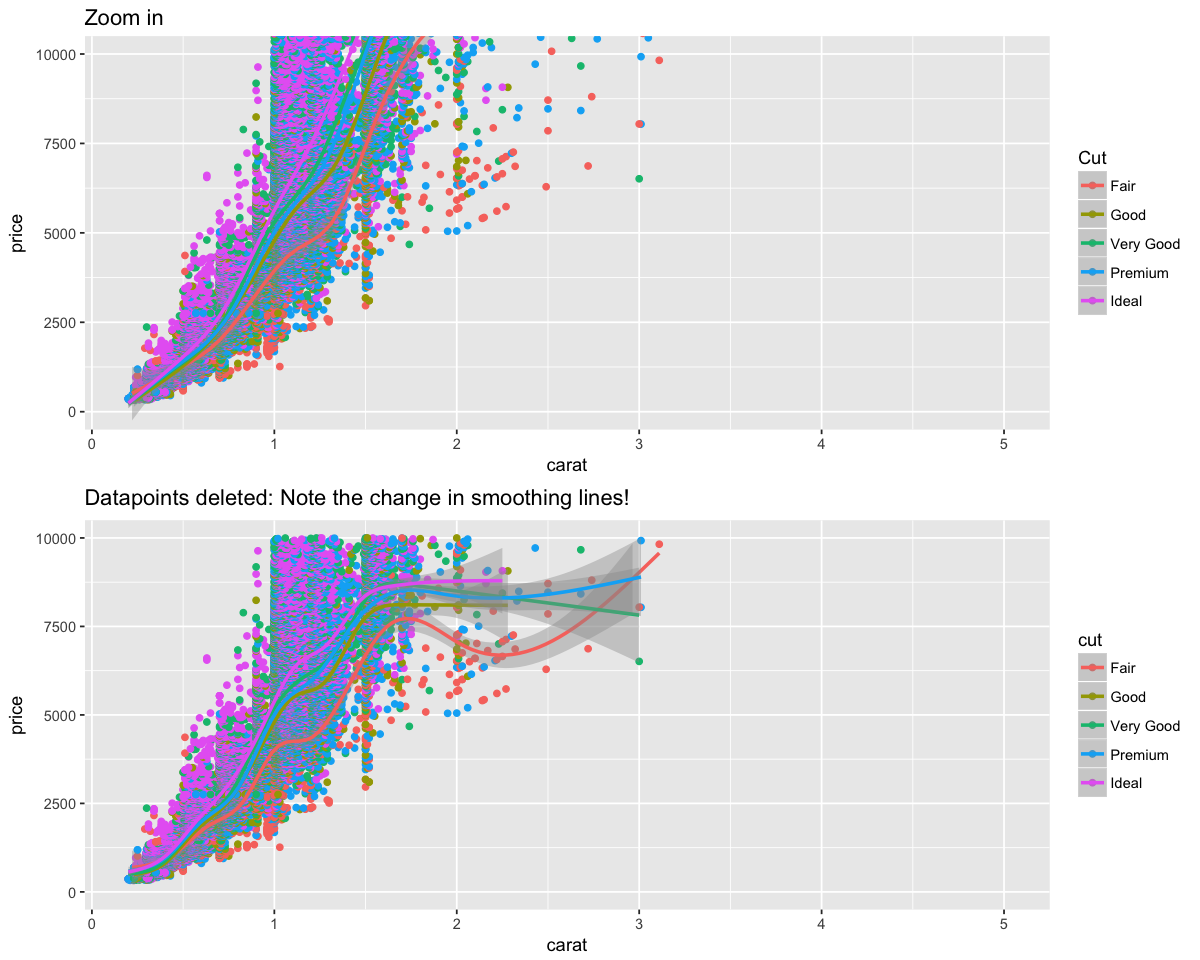

In [154]:
plot1 <- (ggplot(diamonds, aes(x=carat, y=price, color=cut)) + geom_point() + geom_smooth()
     + scale_color_discrete('Cut') + labs(title="Zoom in")
     + coord_cartesian(ylim=c(0, 10000))
)

plot2 <- (ggplot(diamonds, aes(x=carat, y=price, color=cut)) + geom_point() + geom_smooth() 
 + ylim(c(0, 10000)) + labs(title="Datapoints deleted: Note the change in smoothing lines!")
)

options(repr.plot.height=8)
grid.arrange(plot1, plot2, ncol=1)

#### 改變主題

- theme_gray()
- theme_bw()
- theme_linedraw()
- theme_light()
- theme_minimal()
- theme_classic()
- theme_void()

The ggthemes package provides [additional ggplot themes](https://github.com/jrnold/ggthemes) that imitates famous magazines and softwares.

In [161]:
options(repr.plot.height=4)

`geom_smooth()` using method = 'gam'


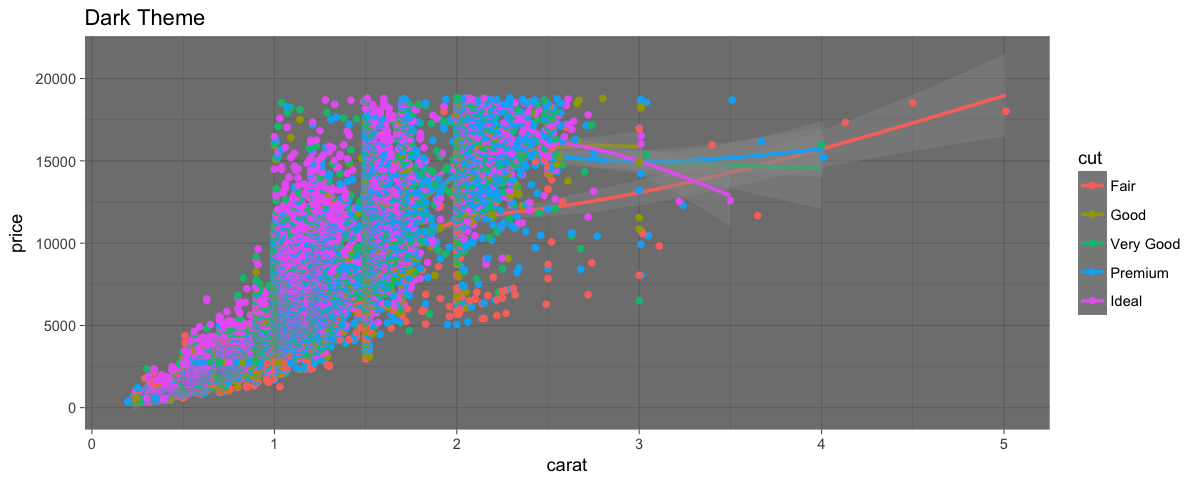

In [173]:
ggplot(diamonds, aes(x=carat, y=price, color=cut)) + geom_smooth() + geom_point() + theme_dark() +
    labs(title="Dark Theme")

#### 色盲調整
Ref
- http://dr-k-lo.blogspot.jp/2013/07/a-color-blind-friendly-palette-for-r.html
- https://www.r-bloggers.com/creating-colorblind-friendly-figures/

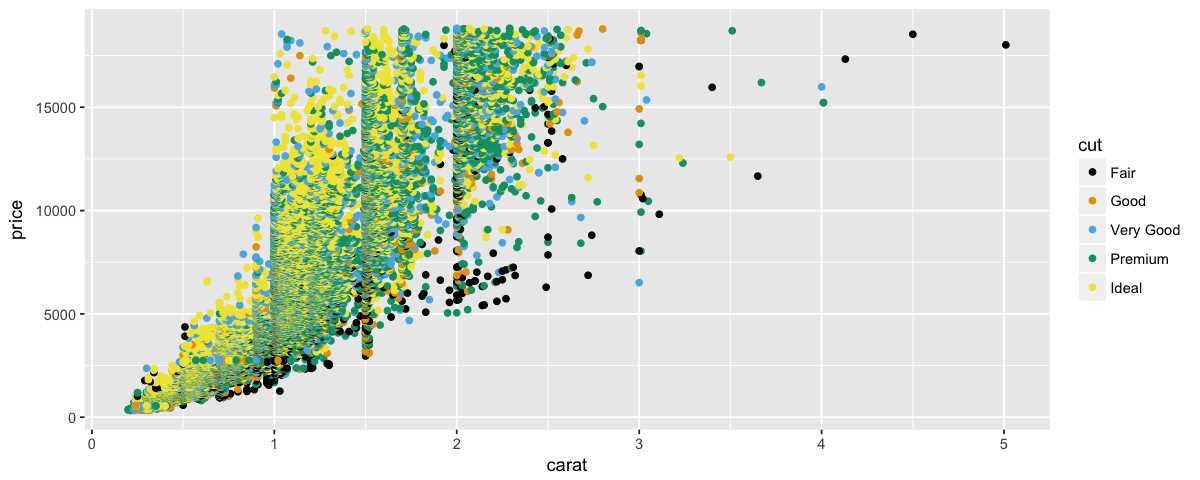

In [171]:
ggplot(diamonds, aes(x=carat, y=price, color=cut)) +
    geom_point() +
    scale_color_manual(values=c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"))

#### Legend - Deleting and Changing Position
- `theme(legend.position="none")`
- 要把 legend 放入 plot 需要 `legend.justification` 以及 `legend.position`

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


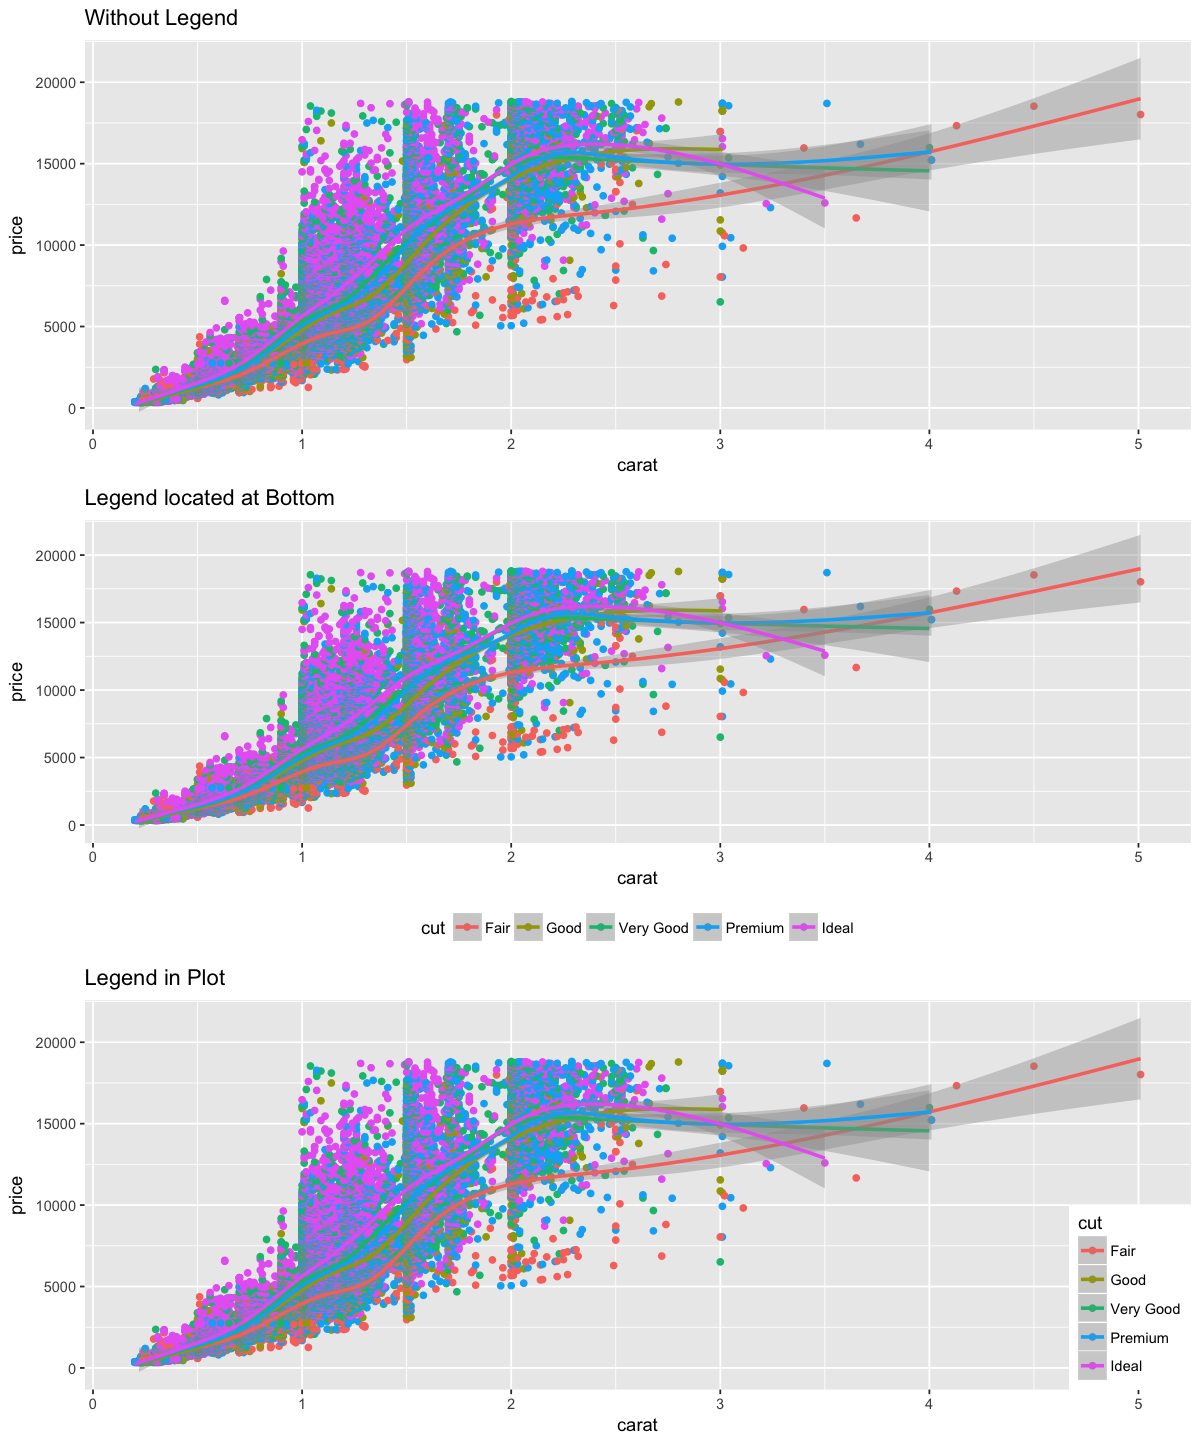

In [182]:
plot <- ggplot(diamonds, aes(x=carat, y=price, color=cut)) + 
    geom_point() + geom_smooth()
options(repr.plot.height=12)
plot1 <- plot + theme(legend.position="none") + labs(title="Without Legend")
plot2 <- plot + theme(legend.position="bottom") + labs(title="Legend located at Bottom")
plot3 <- plot + theme(legend.justification=c(1, 0), legend.position=c(1, 0)) + labs(title="Legend in Plot")
grid.arrange(plot1, plot2, plot3)

#### 格線（Grid lines）

In [184]:
options(repr.plot.width=4, repr.plot.height=3)

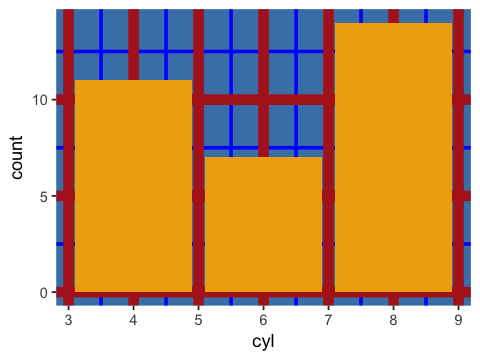

In [185]:
ggplot(mtcars, aes(x=cyl)) + geom_bar(fill='darkgoldenrod2') +
  theme(panel.background = element_rect(fill = 'steelblue'),
  panel.grid.major = element_line(colour = "firebrick", size=3),
  panel.grid.minor = element_line(colour = "blue", size=1))

#### Margin

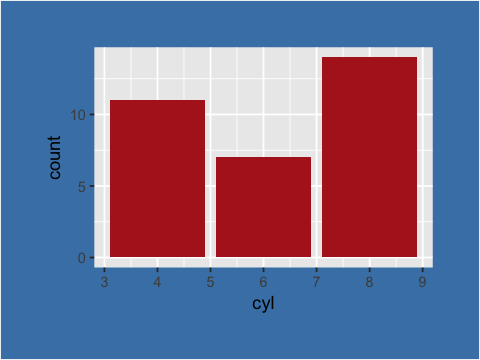

In [190]:
ggplot(mtcars, aes(x=cyl)) + geom_bar(fill="firebrick") + 
    theme(plot.background=element_rect(fill="steelblue"), plot.margin = unit(c(1, 1, 1, 1), "cm")) 
# top, right, bottom, left

#### 在圖上寫字 （Annotation）

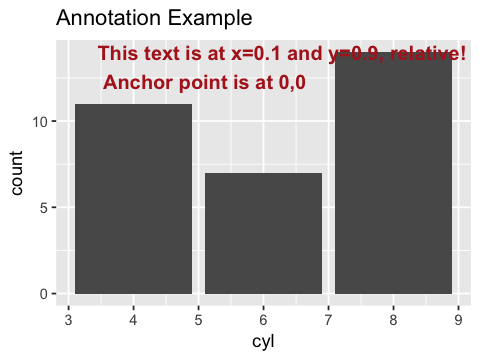

In [192]:
library(grid)
my_grob = grobTree(textGrob("This text is at x=0.1 and y=0.9, relative!\n Anchor point is at 0,0", x=0.1,  y=0.9, hjust=0,
  gp=gpar(col="firebrick", fontface="bold")))
ggplot(mtcars, aes(x=cyl)) + geom_bar() + annotation_custom(my_grob) + labs(title="Annotation Example")

#### 存圖

In [193]:
plot1 <- ggplot(mtcars, aes(x=cyl)) + geom_bar()
ggsave("myggplot.png")  # saves the last plot.
ggsave("myggplot.png", plot=plot1)  # save a stored ggplot

Saving 7 x 7 in image
Saving 7 x 7 in image
